<a href="https://colab.research.google.com/github/zia207/r-colab/blob/main/NoteBook/Advance_Regression/01_Generalized_Linear_Models/02-01-01-glm-regression-r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://drive.google.com/uc?export=view&id=1bLQ3nhDbZrCCqy_WCxxckOne2lgVvn3l)

# 1. Generalized Linear Regression (Gaussian)

In this tutorial, we will explore Generalized Linear Models (GLMs), focusing on the Gaussian distribution, one of the most commonly used in GLMs. These models extend linear regression, enabling us to analyze a wider range of data types and relationships. We will start with an overview of GLM structure, discussing the random component (distribution), systematic component (predictors), and link function (mean transformation). We will establish a solid understanding of the fundamentals by constructing a GLM model using synthetic data without built-in R packages. Next, we will fit a GLM using R’s `glm()` function, interpreting the output to assess the influence of predictors and their statistical significance. We will also evaluate model performance and use R’s visualization libraries to create helpful graphics to interpret our results. This tutorial will equip you with the theoretical foundation and practical skills to confidently apply Gaussian GLMs in R for various statistical modeling applications.





## Overview

**Generalized Linear Models (GLMs)** with a Gaussian distribution are useful for modeling relationships between a continuous response variable and one or more explanatory variables when the error terms are normally distributed. This is a generalization of linear regression where the assumptions of `Gaussian` distribution apply. Here's an outline of the mathematical background and the steps to fit such a model.

1.  **Model Specification**:

    -   The model assumes that the dependent variable $Y$ follows a Gaussian (normal) distribution:
    
  $$ Y \sim \mathcal{N}(\mu, \sigma^2) $$

    -   Here, $\mu$ (the mean of $Y$) is modeled as a linear combination of predictors $X$, so:

        $$ \mu = X\beta $$

    -   Therefore, the model can be written as:

        $$ Y = X\beta + \epsilon $$

        where $\epsilon \sim \mathcal{N}(0, \sigma^2)$ represents the error term.

2.  **Link Function**:

    -   The identity link function is used for Gaussian models, meaning that we assume $E[Y | X] = X\beta$.

3.  **Parameter Estimation**:

    -   The coefficients $\beta$ are estimated by minimizing the sum of squared errors (SSE):

    $$ \text{SSE} = \sum_{i=1}^n (Y_i - X_i\beta)^2 $$

    -   The solution is given by:

    $$\beta = (X^T X)^{-1} X^T Y$$

    -   This is derived using calculus (specifically, by taking the derivative of SSE with respect to ( $\beta$ ), setting it to zero, and solving).

4.  **Prediction**:

    -   Once ( $\beta$ ) is estimated, we can predict new values of $Y$ as:

    $$ \hat{Y} = X\beta $$

5.  **Interpretation**:

    -   Each coefficient $\beta_j$ represents the change in $Y$ for a one-unit increase in $X_j$, holding other predictors constant.



## Setup R in Python Runtype

### Install rpy2

{rpy2} is a Python package that provides an interface to the R programming language, allowing Python users to run R code, call R functions, and manipulate R objects directly from Python. It enables seamless integration between Python and R, leveraging R's statistical and graphical capabilities while using Python's flexibility. The package supports passing data between the two languages and is widely used for statistical analysis, data visualization, and machine learning tasks that benefit from R's specialized libraries.

In [ ]:
!pip uninstall rpy2 -y
!pip install rpy2==3.5.1
%load_ext rpy2.ipython

Found existing installation: rpy2 3.5.17
Uninstalling rpy2-3.5.17:
  Successfully uninstalled rpy2-3.5.17
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp311-cp311-linux_x86_64.whl size=314973 sha256=c618835b53d1075a4e5cbc7641c7c5bc7bbcecd21067594f83cc417ba7350e16
  Stored in directory: /root/.cache/pip/wheels/e9/55/d1/47be85a5f3f1e1f4d1e91cb5e3a4dcb40dd72147f184c5a5ef
Successfully built rpy2


### Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## GLM Regresion Model from Scratch

To fit a Generalized Linear Model (GLM) with a Gaussian distribution in R without using any packages, we’ll walk through each step, from generating synthetic data to estimating the model parameters and creating a summary statistics table. Let’s break down each mathematical concept and translate it into R code.

Steps to Fit the Model in R are below:

### Generate Synthetic Data

We'll start by generating synthetic data with four covariates and a continuous response variable.

1.  **Define Number of Observations**: ( $n$ = 100 ).

2.  **Generate Covariates** ($X_1, X_2, X_3, X_4$ ) from a normal distribution with mean ( 0 ) and standard deviation ( 1 ).

3.  **Specify True Coefficients**: Choose known values for the coefficients ($\beta_0$ = 5 ) (intercept), ($\beta$ = \[1.5, -2.0, 0.5, 3.0\]).

4.  **Generate the Response Variable (\$Y)** using the formula:

    $$ Y = \beta\_0 + \beta\_1 X_1 + \beta\_2 X_2 + \beta\_3 X_3 + \beta\_4 X_4 + \epsilon$$

where $\epsilon \sim N(0, 1)$ represents Gaussian noise.

In [ ]:
%%R
# Step 1: Generate Synthetic Data
set.seed(42)
n <- 100

# Generate covariates
X1 <- rnorm(n, 0, 1)
X2 <- rnorm(n, 0, 1)
X3 <- rnorm(n, 0, 1)
X4 <- rnorm(n, 0, 1)

# Define true coefficients
beta_0 <- 5
beta_true <- c(1.5, -2.0, 0.5, 3.0)

# Generate response variable Y
Y <- beta_0 + beta_true[1]*X1 + beta_true[2]*X2 + beta_true[3]*X3 + beta_true[4]*X4 + rnorm(n, 0, 1)

### Define the Design Matrix ( $X$ )

To estimate the coefficients, we need a design matrix ($X$) that includes an intercept term. The matrix ($X$) will look like this:

$$ X =
\begin{bmatrix}
1 & X_{1,1} & X_{1,2} & X_{1,3} & X_{1,4} \\
1 & X_{2,1} & X_{2,2} & X_{2,3} & X_{2,4} \\
\vdots & \vdots & \vdots & \vdots & \vdots \\
1 & X_{n,1} & X_{n,2} & X_{n,3} & X_{n,4}
\end{bmatrix} $$

where the first column is all ones for the intercept, and the remaining columns are values of the covariates ( \$X_1, X_2, X_3, X_4 \$) for each observation.

In [ ]:
%%R
# Step 2: Define Design Matrix X with Intercept
X <- cbind(1, X1, X2, X3, X4)
head(X)

               X1         X2         X3           X4
[1,] 1  1.3709584  1.2009654 -2.0009292 -0.004620768
[2,] 1 -0.5646982  1.0447511  0.3337772  0.760242168
[3,] 1  0.3631284 -1.0032086  1.1713251  0.038990913
[4,] 1  0.6328626  1.8484819  2.0595392  0.735072142
[5,] 1  0.4042683 -0.6667734 -1.3768616 -0.146472627
[6,] 1 -0.1061245  0.1055138 -1.1508556 -0.057887335



### Estimate Coefficients Using the Normal Equation

For Gaussian GLMs, estimating the coefficients ( $\beta$) reduces to solving the **Normal Equation**:

$$\hat{\beta} = (X^T X)^{-1} X^T Y$$

**Compute** $X^TX$: This is the matrix product of the transpose of ($X$) with ($X$).

**Compute** $(X^T X)^{-1}$: Invert the result from step 1.

**Compute** $X^T Y$: This is the product of the transpose of $X$ and the response vector ($Y$ ).

**Solve for** $\hat{\beta}$: Multiply the results from step 2 with step 3 to obtain the estimated coefficients.


In [ ]:
%%R
# Step 3: Estimate Coefficients Using Normal Equation
XtX <- t(X) %*% X
XtX_inv <- solve(XtX)
XtY <- t(X) %*% Y
beta_hat <- XtX_inv %*% XtY
beta_hat

         [,1]
    4.8602898
X1  1.5859543
X2 -2.1482949
X3  0.5901182
X4  3.2139250


### Calculate Fitted Values and Residuals

-   \*\*Fitted Values $\hat{Y}$: Using the estimated coefficients $\hat{\beta}$, calculate the fitted values as:

$$ \hat{Y} = X \hat{\beta}$$

-   **Residuals**: Calculate the residuals, which represent the difference between the observed values $Y$ and fitted values $\hat{Y}$:

$$ \text{residuals} = Y - \hat{Y} $$


In [ ]:
%%R
# Step 4: Calculate Fitted Values and Residuals
Y_hat <- X %*% beta_hat
residuals <- Y - Y_hat
head(residuals)

            [,1]
[1,]  1.71618876
[2,] -0.71880623
[3,] -0.09868479
[4,]  0.06564803
[5,] -0.41685869
[6,] -0.71816280


### Compute Mean Squared Error (MSE) and Variance of Residuals

The Mean Squared Error (MSE) measures the average of the squared residuals:

$$\text{MSE} = \frac{1}{n}\sum_{i=1}^{n} (Y_i - \hat{Y}_i)^2$$

The variance of the residuals, used for calculating standard errors, is given by:

$$ \text{Var(residuals)} = \frac{1}{n - p - 1}\sum_{i=1}^{n} (Y_i - \hat{Y}_i)^2$$

where ($p$ ) is the number of covariates (in our case, ( p = 4)

In [ ]:
%%R
# Step 5: Calculate MSE and Variance of Residuals
mse <- mean(residuals^2)
variance_residuals <- sum(residuals^2) / (n - length(beta_hat))

cat("Mean Squared Error (MSE):", mse, "\n")
cat("Variance Residuals:", variance_residuals, "\n")


Mean Squared Error (MSE): 0.965506 
Variance Residuals: 1.016322 


### Calculate Standard Errors and t-values for Coefficients

-   **Standard Errors**: The standard error for each coefficient ( \hat{\beta}\_j ) is given by:

$$ \text{Std Error}(\hat{\beta}*j) =* \sqrt{\text{Var(residuals)} \times [ (X^T X)^{-1} ]_{jj} } $$

where ( $[(X^T X)^{-1}]{jj}$ is the $j-th$ diagonal element of the inverse of $X^T X$\$

-   **t-values**: The t-value for each coefficient tests the null hypothesis that the coefficient is zero. It is calculated as:

$$t\text{-value} = \frac{\hat{\beta}_j}{\text{Std Error}(\hat{\beta}_j)}$$

In [ ]:
%%R
# Step 6: Calculate Standard Errors and t-values
std_errors <- sqrt(variance_residuals * diag(XtX_inv))
t_values <- beta_hat / std_errors


### Create a Summary Table


In [ ]:
%%R
# Step 7: Create Summary Table
summary_table <- data.frame(
  Coefficient = beta_hat,
  `Std Error` = std_errors,
  `t-value` = t_values
)

# Display Results
print(summary_table)

   Coefficient  Std.Error    t.value
     4.8602898 0.10141388  47.925291
X1   1.5859543 0.09864811  16.076884
X2  -2.1482949 0.11244878 -19.104652
X3   0.5901182 0.10104992   5.839868
X4   3.2139250 0.11603554  27.697764


### Model Performance

Evaluating a Generalized Linear Model (GLM) involves several key metrics to assess its fit and predictive power. Below, I’ll outline the main evaluation metrics commonly used for a Gaussian GLM, along with their calculations.


#### Evaluation Matrix


1. ***Mean Squared Error (MSE)***:
   - Measures the average of the squares of the errors (residuals), which is the difference between the predicted and actual values.
   
   $$ \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (Y_i - \hat{Y}_i)^2 $$

2. ***Root Mean Squared Error (RMSE)***:

   - The square root of MSE, providing an error metric in the same units as the response variable.
   
   $$ \text{RMSE} = \sqrt{\text{MSE}} $$
   

3. ***Mean Absolute Error (MAE)***:

   - Measures the average absolute errors, providing a straightforward interpretation of the average error magnitude.

   $$ \text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |Y_i - \hat{Y}_i|$$


4. ***R-squared ($R^2$)***:

   - Indicates the proportion of variance in the response variable that can be explained by the model.

   $$ R^2 = 1 - \frac{\text{SS}_{\text{res}}}{\text{SS}_{\text{tot}}}  $$
   where:
   
   - $\text{SS}_{\text{res}} = \sum_{i=1}^{n} (Y_i - \hat{Y}_i)^2 $
   - $\text{SS}_{\text{tot}} = \sum_{i=1}^{n} (Y_i - \bar{Y})^2 $

5. ***Adjusted R-squared***:

   - Adjusts the R-squared value based on the number of predictors in the model, providing a more accurate assessment when comparing models.
   
   $$ \text{Adjusted } R^2 = 1 - \left( \frac{(1 - R^2)(n - 1)}{n - p - 1} \right) $$
   
   where  $p$ is the number of predictors.

6. ***Akaike Information Criterion (AIC)***:

   - Provides a measure of model quality that accounts for the number of parameters.
   
   $$  \text{AIC} = n \log\left(\frac{\text{SS}_{\text{res}}}{n}\right) + 2p  $$

7. ***Bayesian Information Criterion (BIC)***:

   - Similar to AIC but with a larger penalty for models with more parameters.
   
   $$   \text{BIC} = n \log\left(\frac{\text{SS}_{\text{res}}}{n}\right) + p \log(n)$$
   

In [ ]:
%%R
### Calculating the Metrics

# Observed Values Y: The actual response values.
# Fitted Values Y_hat: The predicted response values from the model.
# umber of Observations, n: 100
# Number of Predictors, p : 4 (excluding the intercept)."

n <- 100  # Number of observations
p <- 4    # Number of predictors (X1, X2, X3, X4)

# Step 1: Calculate MSE
MSE <- mean((Y - Y_hat)^2)

# Step 2: Calculate RMSE
RMSE <- sqrt(MSE)

# Step 3: Calculate MAE
MAE <- mean(abs(Y - Y_hat))

# Step 4: Calculate R-squared
SS_res <- sum((Y - Y_hat)^2)  # Residual sum of squares
SS_tot <- sum((Y - mean(Y))^2)  # Total sum of squares
R_squared <- 1 - (SS_res / SS_tot)

# Step 5: Calculate Adjusted R-squared
adjusted_R_squared <- 1 - ((1 - R_squared) * (n - 1)) / (n - p - 1)

# Step 6: Calculate AIC
AIC <- n * log(SS_res / n) + 2 * (p + 1)  # +1 for the intercept

# Step 7: Calculate BIC
BIC <- n * log(SS_res / n) + (p + 1) * log(n)  # +1 for the intercept

# Print results
cat("Mean Squared Error (MSE):", MSE, "\n")
cat("Root Mean Squared Error (RMSE):", RMSE, "\n")
cat("Mean Absolute Error (MAE):", MAE, "\n")
cat("R-squared:", R_squared, "\n")
cat("Adjusted R-squared:", adjusted_R_squared, "\n")
cat("Akaike Information Criterion (AIC):", AIC, "\n")
cat("Bayesian Information Criterion (BIC):", BIC, "\n")

Mean Squared Error (MSE): 0.965506 
Root Mean Squared Error (RMSE): 0.9826017 
Mean Absolute Error (MAE): 0.7571292 
R-squared: 0.9372941 
Adjusted R-squared: 0.9346539 
Akaike Information Criterion (AIC): 6.489706 
Bayesian Information Criterion (BIC): 19.51556 



#### K-fold Cross-validation

-   **Split the Data**: Randomly divide the dataset into $K$ equal-sized folds.

-   **Training and Testing**:

    -   For each fold, use $k-1$ folds for training the model and the remaining fold for testing.

    -   Repeat this process $k$ times, ensuring that each fold serves as the test set once.

-   **Model Fitting**: Fit the GLM on the training set for each iteration.

-   **Prediction**: Use the fitted model to make predictions on the test set.

-   **Performance Metrics**: Calculate evaluation metrics (e.g., MSE, RMSE, MAE, etc.) for each fold.

-   **Aggregate Results**: Compute the average and standard deviation of the performance metrics across all folds

In [ ]:
%%R
# K-Fold Cross-Validation

k <- 10  # Number of folds
folds <- cut(seq(1, n), breaks = k, labels = FALSE)
cv_mse <- numeric(k)  # Store MSE for each fold

for (i in 1:k) {
  # Split data into training and validation sets
  test_indices <- which(folds == i, arr.ind = TRUE)
  train_indices <- setdiff(1:n, test_indices)

  # Training set
  X_train <- X[train_indices, ]
  Y_train <- Y[train_indices]

  # Testing set
  X_test <- X[test_indices, ]
  Y_test <- Y[test_indices]

  # Fit the model on training data
  XtX_train <- t(X_train) %*% X_train
  XtX_inv_train <- solve(XtX_train)
  XtY_train <- t(X_train) %*% Y_train
  beta_hat_train <- XtX_inv_train %*% XtY_train

  # Predict on test set
  Y_pred <- X_test %*% beta_hat_train

  # Calculate MSE for this fold
  cv_mse[i] <- mean((Y_test - Y_pred)^2)
}

# Average MSE across folds
average_cv_mse <- mean(cv_mse)
cat("Average K-Fold Cross-Validation MSE:", average_cv_mse, "\n")

Average K-Fold Cross-Validation MSE: 1.120817 


#### 1:1 Plot Predicted vs Observed Values

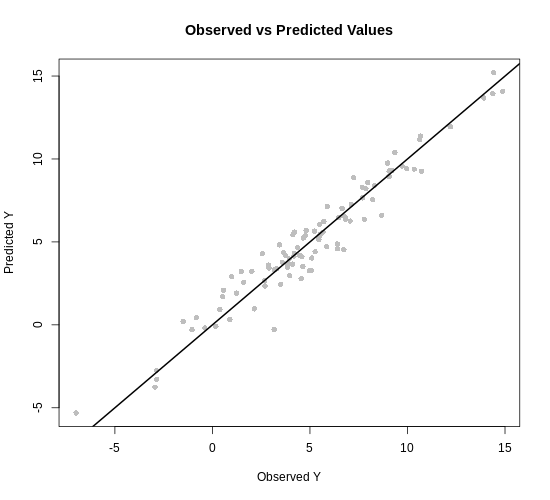

In [ ]:
%%R -h 500 -w 550 -u px
# Plot Observed vs Predicted Values
plot(Y, Y_hat, main = "Observed vs Predicted Values",
     xlab = "Observed Y",
     ylab = "Predicted Y", pch = 16, col = "grey")
abline(0, 1, col = "black", lwd = 2)  # Add a 1:1 line for reference

## GLM Regression Model in R

To fit a Generalized Linear Model (GLM) with a Gaussian distribution using the `glm()` function from base R, we’ll go through each step, including data exploration, fitting the model,  interpretation and evaluate the model performance with a oldout test data set.

### Check and Install Required R Packages

We will install and load the necessary R packages for data manipulation, visualization, and model fitting. The packages include `tidyverse`, `boot`, `margins`, `ggeffects`, `performance`, `sjPlot`, `patchwork`, `gt`, `gtsummary`, `jtools`, `report`, and `Metrics`.





In [ ]:
%%R
# Packages List
packages <- c(
  "tidyverse",   # Includes readr, dplyr, ggplot2, etc.
  "plyr",
  "rstatix",
  "boot",
  "margins",
  "marginaleffects",
  "ggeffects",
  "performance",
  "ggpmisc",
  "sjPlot",
  "patchwork",
  "gt",
  "gtsummary",
  "jtools",
  "report",
  "Metrics",
  "MASS"
  )

In [ ]:
%%R
# Install missing packages
new.packages <- packages[!(packages %in% installed.packages(lib='drive/My Drive/R/')[,"Package"])]
if(length(new.packages)) install.packages(new.packages, lib='drive/My Drive/R/')

In [ ]:
%%R
# set library path
.libPaths('drive/My Drive/R')
# Verify installation
cat("Installed packages:\n")
print(sapply(packages, requireNamespace, quietly = TRUE))

Installed packages:
      tidyverse            plyr         rstatix            boot         margins 
           TRUE            TRUE            TRUE            TRUE            TRUE 
marginaleffects       ggeffects     performance         ggpmisc          sjPlot 
           TRUE            TRUE            TRUE            TRUE            TRUE 
      patchwork              gt       gtsummary          jtools          report 
           TRUE            TRUE            TRUE            TRUE            TRUE 
        Metrics            MASS 
           TRUE            TRUE 


### Load R Packages


In [ ]:
%%R
# set library path
.libPaths('drive/My Drive/R')

# Load packages with suppressed messages
invisible(lapply(packages, function(pkg) {
  suppressPackageStartupMessages(library(pkg, character.only = TRUE))
}))

# Check loaded packages
cat("Successfully loaded packages:\n")
print(search()[grepl("package:", search())])

Successfully loaded packages:
 [1] "package:MASS"            "package:Metrics"        
 [3] "package:report"          "package:jtools"         
 [5] "package:gtsummary"       "package:gt"             
 [7] "package:patchwork"       "package:sjPlot"         
 [9] "package:ggpmisc"         "package:ggpp"           
[11] "package:performance"     "package:ggeffects"      
[13] "package:marginaleffects" "package:margins"        
[15] "package:boot"            "package:rstatix"        
[17] "package:plyr"            "package:lubridate"      
[19] "package:forcats"         "package:stringr"        
[21] "package:dplyr"           "package:purrr"          
[23] "package:readr"           "package:tidyr"          
[25] "package:tibble"          "package:ggplot2"        
[27] "package:tidyverse"       "package:tools"          
[29] "package:stats"           "package:graphics"       
[31] "package:grDevices"       "package:utils"          
[33] "package:datasets"        "package:methods"        
[

#### Data

The **Boston** dataset from the `MASS` package in R contains housing data for 506 census tracts of Boston from the 1970s. It is used for regression, with the goal of predicting median house values (`medv`). The dataset includes 14 variables such as crime rate (`crim`), proportion of residential land (`zn`), air pollution (`nox`), average rooms per dwelling (`rm`), and socioeconomic status (`lstat`). Notably, it includes the variable `chas` (Charles River dummy) and `black` (index related to Black population). Due to ethical concerns over some variables, the dataset is primarily used for educational purposes and should not be used for real-world inference.

In [ ]:
%%R
# Load data
data("Boston", library = `MASS`)
# Create a data frame with selected variables
df <- Boston %>%
  dplyr::select(medv, crim, zn, indus, chas, nox, rm, age, dis, rad, tax, ptratio, black, lstat)

# Convert chas to factor (categorical variable)
df$chas <- as.factor(df$chas)

# Convert rad and tax to numeric (in case they are integers or factors)
df$rad <- as.numeric(df$rad)
df$tax <- as.numeric(df$tax)

# Verify data types
str(df)

'data.frame':	506 obs. of  14 variables:
 $ medv   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...
 $ crim   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ zn     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ indus  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ chas   : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ nox    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rm     : num  6.58 6.42 7.18 7 7.15 ...
 $ age    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dis    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ rad    : num  1 2 2 3 3 3 5 5 5 5 ...
 $ tax    : num  296 242 242 222 222 222 311 311 311 311 ...
 $ ptratio: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ black  : num  397 397 393 395 397 ...
 $ lstat  : num  4.98 9.14 4.03 2.94 5.33 ...


#### Summary Statistics

In [ ]:
%%R
df |>
  dplyr::select(crim, zn, indus, nox, rm, age, dis, tax, ptratio, lstat, medv) |>
  rstatix::get_summary_stats(type = "common")

# A tibble: 11 × 10
   variable     n     min     max  median     iqr    mean      sd    se     ci
   <fct>    <dbl>   <dbl>   <dbl>   <dbl>   <dbl>   <dbl>   <dbl> <dbl>  <dbl>
 1 crim       506   0.006  89.0     0.257   3.60    3.61    8.60  0.382  0.751
 2 zn         506   0     100       0      12.5    11.4    23.3   1.04   2.04 
 3 indus      506   0.46   27.7     9.69   12.9    11.1     6.86  0.305  0.599
 4 nox        506   0.385   0.871   0.538   0.175   0.555   0.116 0.005  0.01 
 5 rm         506   3.56    8.78    6.21    0.738   6.28    0.703 0.031  0.061
 6 age        506   2.9   100      77.5    49.0    68.6    28.1   1.25   2.46 
 7 dis        506   1.13   12.1     3.21    3.09    3.80    2.11  0.094  0.184
 8 tax        506 187     711     330     387     408.    169.    7.49  14.7  
 9 ptratio    506  12.6    22      19.0     2.8    18.5     2.16  0.096  0.189
10 lstat      506   1.73   38.0    11.4    10.0    12.7     7.14  0.317  0.624
11 medv       506   5      50   

#### Correlation

In [ ]:
%%R
df |>
  dplyr::select(crim, zn, indus, nox, rm, age, dis, tax, ptratio, lstat, medv) |>
  rstatix::cor_test(medv)

# A tibble: 10 × 8
   var1  var2      cor statistic        p conf.low conf.high method 
   <chr> <chr>   <dbl>     <dbl>    <dbl>    <dbl>     <dbl> <chr>  
 1 medv  crim    -0.39     -9.46 1.17e-19   -0.460    -0.312 Pearson
 2 medv  zn       0.36      8.68 5.71e-17    0.282     0.434 Pearson
 3 medv  indus   -0.48    -12.4  4.9 e-31   -0.548    -0.414 Pearson
 4 medv  nox     -0.43    -10.6  7.07e-24   -0.496    -0.353 Pearson
 5 medv  rm       0.7      21.7  2.49e-74    0.647     0.738 Pearson
 6 medv  age     -0.38     -9.14 1.57e-18   -0.449    -0.300 Pearson
 7 medv  dis      0.25      5.79 1.21e- 8    0.166     0.330 Pearson
 8 medv  tax     -0.47    -11.9  5.64e-29   -0.534    -0.398 Pearson
 9 medv  ptratio -0.51    -13.2  1.61e-34   -0.570    -0.440 Pearson
10 medv  lstat   -0.74    -24.5  5.08e-88   -0.775    -0.695 Pearson


#### Boxplot and Jitter Plots

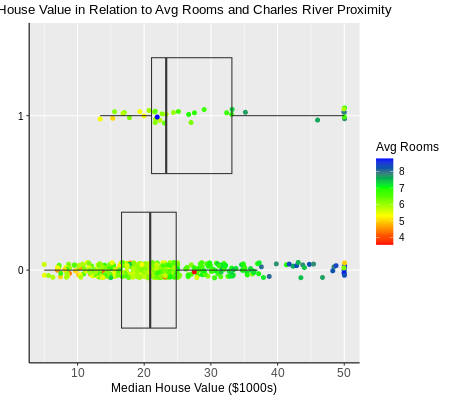

In [ ]:
%%R -w 450 -h 400 -u px

# Create a custom color palette
rgb.palette <- colorRampPalette(c("red", "yellow", "green", "blue"), space = "rgb")

# Create plot with chas (Charles River dummy) as categorical variable
ggplot(df, aes(y = medv, x = chas)) +
  geom_point(aes(colour = rm), size = 1.7, position = position_jitter(width = 0.05, height = 0.05)) +
  geom_boxplot(fill = NA, outlier.colour = NA) +
  labs(title = "") +
  coord_flip() +
  scale_colour_gradientn(name = "Avg Rooms", colours = rgb.palette(10)) +
  theme(legend.text = element_text(size = 10), legend.title = element_text(size = 12)) +
  labs(y = "Median House Value ($1000s)", x = "") +
  ggtitle("House Value in Relation to Avg Rooms and Charles River Proximity") +
  theme(
    axis.line = element_line(colour = "black"),
    plot.title = element_text(hjust = 0.5),
    axis.title.x = element_text(size = 12),
    axis.text.y = element_text(size = 10, vjust = 0.5, hjust = 0.5, colour = "black"),
    axis.text.x = element_text(size = 12)
  )


#### Data Processing

We will apply following operation before fit a GLM regression model.

1.  **Feature engineering**: Feature engineering is a vital task in the data preparation process for data analysis, particularly for machine learning models. It is the practice of creating new features from existing ones or transforming them to enhance the machine learning algorithm's performance. Doing so makes achieving higher accuracy, better generalization, and a more straightforward interpretation of the model possible. Some standard techniques used in feature engineering include dimensionality reduction, feature scaling, and feature extraction. When performing feature engineering, it is essential to consider the data type, distribution, and target variable, among other factors.

We will create a new feature (Sand_Silt) by adding soil Silt and Sand percentage

2.  **Convert to factors**: As Land_type is categorical variable representing distinct categories rather than numerical values, we need to convert them into factors. This process will allow us to analyze and interpret the data more accurately, facilitating a better understanding of the underlying patterns and trends.

3.  **Data normalization**: It is a technique used in data analysis and machine learning. It involves adjusting numerical values to a standard range, usually between 0 and 1 or with a mean of 0 and a standard deviation of 1. This helps to improve the efficiency and accuracy of machine learning algorithms. Data normalization is important because it helps machine learning models work better. By standardizing the data, the models can more easily identify patterns and relationships in the data, which leads to better predictions and results.

In [ ]:
%%R
#### Data Processing
mf <- df |>
  dplyr::select(crim, zn, indus, nox, rm, age, dis, tax, ptratio, lstat, chas, medv) |>
  # Convert chas to factor
  dplyr::mutate_at(vars(chas), funs(factor)) |>
  # Create a new feature: crim_lstat (combining crime rate and lower status percentage)
  dplyr::mutate(crim_lstat = crim + lstat) |>
  # Drop original crim and lstat
  dplyr::select(-c(crim, lstat)) |>
  # Relocate variables
  dplyr::relocate(medv, .after = crim_lstat) |>
  dplyr::relocate(chas, .after = crim_lstat) |>
  # Normalize numerical features
  dplyr::mutate_at(1:9, funs((.-min(.))/max(.-min(.)))) |>
  glimpse()

Rows: 506
Columns: 11
$ zn         <dbl> 0.180, 0.000, 0.000, 0.000, 0.000, 0.000, 0.125, 0.125, 0.1…
$ indus      <dbl> 0.06781525, 0.24230205, 0.24230205, 0.06304985, 0.06304985,…
$ nox        <dbl> 0.3148148, 0.1728395, 0.1728395, 0.1502058, 0.1502058, 0.15…
$ rm         <dbl> 0.5775053, 0.5479977, 0.6943859, 0.6585553, 0.6871048, 0.54…
$ age        <dbl> 0.6416066, 0.7826982, 0.5993821, 0.4418126, 0.5283213, 0.57…
$ dis        <dbl> 0.2692031, 0.3489620, 0.3489620, 0.4485446, 0.4485446, 0.44…
$ tax        <dbl> 0.20801527, 0.10496183, 0.10496183, 0.06679389, 0.06679389,…
$ ptratio    <dbl> 0.2872340, 0.5531915, 0.5531915, 0.6489362, 0.6489362, 0.64…
$ crim_lstat <dbl> 0.028536580, 0.068671794, 0.019618401, 0.009203763, 0.03249…
$ chas       <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ medv       <dbl> 24.0, 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9,…


#### Split Data

We will use the `ddply()` function of the **plyr** package to split housing data into homogeneous subgroups using **stratified random sampling**. This method involves dividing the population into strata and taking random samples from each stratum to ensure that each subgroup is proportionally represented in the sample. The goal is to obtain a representative sample of the population by adequately representing each stratum.


In [ ]:
%%R
# Split Data
seeds <- 11076
tr_prop <- 0.70
train <- ddply(mf, .(chas), function(., seed) { set.seed(seed); .[sample(1:nrow(.), trunc(nrow(.) * tr_prop)), ] }, seed = 101)
test <- ddply(mf, .(chas), function(., seed) { set.seed(seed); .[-sample(1:nrow(.), trunc(nrow(.) * tr_prop)), ] }, seed = 101)

**Stratified random sampling** is a technique for selecting a representative sample from a population, where the sample is chosen in a way that ensures that certain subgroups within the population are adequately represented in the sample.

### Fit a GLM Regression Model

In the context of a GLM with continuous response variables, the focus is on regression problems where the dependent variable, which is being predicted, is continuous. This implies that the variable can take any value within a specific range, and the objective is to identify a correlation between the dependent variable and the independent variables that can be used to make accurate predictions.

To create a `GLM` (continuous response variables) in `R`, we will use the `glm()` function with `family=gaussian(link = "identity")`. The `medv` variable will be used as a response variable, while all the other variables in the `train` will serve as predictors


In [ ]:
%%R
# Fit a GLM Model
fit.glm <- glm(medv ~ ., data = train, family = gaussian(link = "identity"))

### Model Summary

 The `summary()` function provides a summary of the fitted GLM model, including coefficients, standard errors, t-values, and p-values, among other statistics. This summary can help you interpret the relationship between the predictors and the response variable.

In [ ]:
%%R
summary(fit.glm)


Call:
glm(formula = medv ~ ., family = gaussian(link = "identity"), 
    data = train)

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   25.105      2.444  10.272  < 2e-16 ***
zn             3.766      1.690   2.229   0.0265 *  
indus         -3.118      2.061  -1.513   0.1313    
nox           -9.588      2.269  -4.226 3.06e-05 ***
rm            28.235      2.532  11.149  < 2e-16 ***
age           -2.093      1.518  -1.379   0.1688    
dis          -17.280      2.675  -6.459 3.62e-10 ***
tax            2.006      1.546   1.298   0.1953    
ptratio       -8.594      1.460  -5.886 9.42e-09 ***
crim_lstat   -24.028      3.257  -7.378 1.23e-12 ***
chas1          4.663      1.094   4.264 2.60e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 25.43902)

    Null deviance: 29721.0  on 352  degrees of freedom
Residual deviance:  8700.1  on 342  degrees of freedom
AIC: 2157

Number 

The adequacy of a model is typically determined by evaluating the difference between **Null deviance and Residual deviance**, with a larger discrepancy between the two values indicating a better fit. Null deviance denotes the value obtained when the equation comprises solely the intercept without any variables, while Residual deviance denotes the value calculated when all variables are taken into account. The model can be deemed an appropriate fit when the difference between the two values is substantial enough.

To obtain the `AIC` (Akaike Information Criterion) values for a GLM model in R, you can use the `AIC()` function applied to the fitted model. The lower the AIC value, the better the model fits the data while penalizing for the number of parameters. You can compare AIC values between different models to assess their relative goodness-of-fit.


In [ ]:
%%R
AIC(fit.glm)

[1] 2157.004


`plot_model()` function of {sjPlot} package creates plots the estimates from regression model:

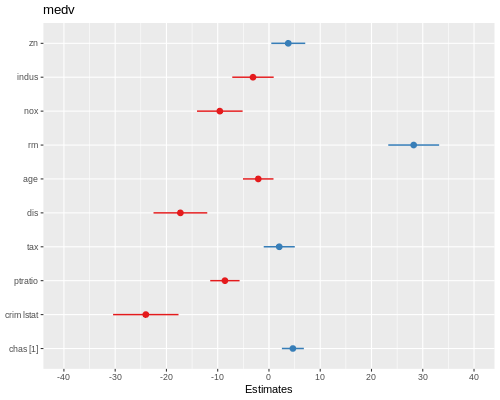

In [ ]:
%%R -w 500 -h 400 -u px
plot_model(fit.glm)

### Model  Interpretation

You can create a report using `reoport()` function of {report} package

In [ ]:
%%R
report::report(fit.glm)

We fitted a linear model (estimated using ML) to predict medv with zn, indus,
nox, rm, age, dis, tax, ptratio, crim_lstat and chas (formula: medv ~ zn +
indus + nox + rm + age + dis + tax + ptratio + crim_lstat + chas). The model's
explanatory power is substantial (R2 = 0.71). The model's intercept,
corresponding to zn = 0, indus = 0, nox = 0, rm = 0, age = 0, dis = 0, tax = 0,
ptratio = 0, crim_lstat = 0 and chas = 0, is at 25.10 (95% CI [20.31, 29.90],
t(342) = 10.27, p < .001). Within this model:

  - The effect of zn is statistically significant and positive (beta = 3.77, 95%
CI [0.45, 7.08], t(342) = 2.23, p = 0.026; Std. beta = 0.10, 95% CI [0.01,
0.19])
  - The effect of indus is statistically non-significant and negative (beta =
-3.12, 95% CI [-7.16, 0.92], t(342) = -1.51, p = 0.130; Std. beta = -0.09, 95%
CI [-0.20, 0.03])
  - The effect of nox is statistically significant and negative (beta = -9.59,
95% CI [-14.03, -5.14], t(342) = -4.23, p < .001; Std. beta = -0.25, 95% CI
[

### Model Performance

In [ ]:
%%R
performance::model_performance(fit.glm)

# Indices of model performance

AIC      |     AICc |      BIC |    R2 |  RMSE | Sigma
------------------------------------------------------
2157.004 | 2157.922 | 2203.402 | 0.707 | 4.965 | 5.044


### Visualization of Model Assumptions

The package {performance} provides many functions to check model assumptions, like `check_collinearity()`, `check_normality()` or `check_heteroscedasticity()`. To get a comprehensive check, use `check_model()`.

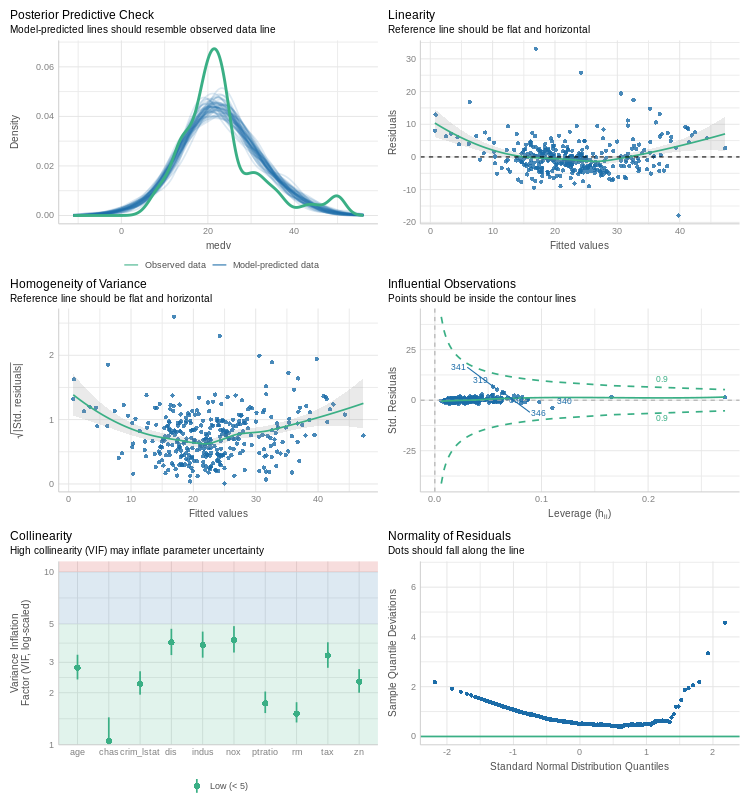

In [ ]:
%%R -w 750 -h 800 -u px
performance::check_model(fit.glm)

### Regression Model Visualization by {jtools}

The {jtools} package consists of a series of functions to automate visualization regression model.


In [ ]:
%%R
jtools::summ(fit.glm)

MODEL INFO:
Observations: 353
Dependent Variable: medv
Type: Linear regression 

MODEL FIT:
χ²(10) = 21020.89, p = 0.00
Pseudo-R² (Cragg-Uhler) = 0.71
Pseudo-R² (McFadden) = 0.17
AIC = 2157.00, BIC = 2203.40 

Standard errors:MLE
-------------------------------------------------
                      Est.   S.E.   t val.      p
----------------- -------- ------ -------- ------
(Intercept)          25.10   2.44    10.27   0.00
zn                    3.77   1.69     2.23   0.03
indus                -3.12   2.06    -1.51   0.13
nox                  -9.59   2.27    -4.23   0.00
rm                   28.24   2.53    11.15   0.00
age                  -2.09   1.52    -1.38   0.17
dis                 -17.28   2.68    -6.46   0.00
tax                   2.01   1.55     1.30   0.20
ptratio              -8.59   1.46    -5.89   0.00
crim_lstat          -24.03   3.26    -7.38   0.00
chas1                 4.66   1.09     4.26   0.00
-------------------------------------------------

Estimated dispersio

### Marginal Effects and Adjusted Predictions

The presentation of regression models, typically in the form of tables, is widely accepted as a clear and accessible method for interpreting results. However, for more intricate models that incorporate interaction or transformed terms, such as quadratic or spline terms, the use of raw regression coefficients may prove less effective, resulting in challenges when interpreting outcomes. In such cases, adjusted predictions or marginal means provide a more fitting solution. The use of visual aids can also assist in the comprehension of such effects or predictions, providing an intuitive understanding of the relationship between predictors and outcomes, even for complex models.

If we want the marginal effects for "chas", you may use `margins()` function of {margins} package:

In [ ]:
%%R
margins::margins(fit.glm, variables = "chas")

 chas1
 4.663


**Marginal Effects**: These refer to the change in the dependent variable when an independent variable changes by one unit, while holding all other variables constant. In simpler terms, it tells us the impact of a small change in one variable on another variable, assuming everything else remains unchanged. Marginal effects are often calculated using derivatives in mathematical models. hey are not the same as marginal means or adjusted prediction

we get the same marginal effect using `avg_slopes()` function from the {marginaleffects} package

In [ ]:
%%R
marginaleffects::avg_slopes(fit.glm, variables = "chas")


 Estimate Std. Error    z Pr(>|z|)    S 2.5 % 97.5 %
     4.66       1.09 4.26   <0.001 15.6  2.52   6.81

Term: chas
Type: response
Comparison: 1 - 0



[{ggeffects}](https://strengejacke.github.io/ggeffects/) is a user-friendly package that helps to calculate adjusted predictions, also known as estimated marginal means, with ease. It allows you to calculate these predictions at the mean or representative values of covariates from statistical models. Additionally, you can compare pairwise contrasts, test predictions and differences in predictions for statistical significance, and produce visually appealing figures to display the results.

![alt text](http://drive.google.com/uc?export=view&id=1s8gWVmKcwHdoJB5ZNufFRWNGWAtz4xCD)


The package is built around three core functions:

-   `predict_response()` (understand your results)

-   `test_predictions()` (check for “significant” results)

-   `plot()` (communicate your results)

To calculate marginal effects and adjusted predictions, the `predict_response()` function is used. This function can return three types of predictions, namely, conditional effects, marginal effects or marginal means, and average marginal effects or counterfactual predictions. You can set the type of prediction you want by using the `margin` argument.

In [ ]:
%%R
effect<-ggeffects::predict_response(fit.glm, "chas", margin = "empirical")
effect

# Average predicted values of medv

chas | Predicted |       95% CI
-------------------------------
0    |     22.55 | 22.00, 23.10
1    |     27.21 | 25.14, 29.29



In [ ]:
%%R
effect$predicted[2] - effect$predicted[1]

[1] 4.663331


{ggeffects} package also supports labelled data and the `plot()` method automatically sets titles, axis - and legend-labels depending on the value and variable labels of the data.

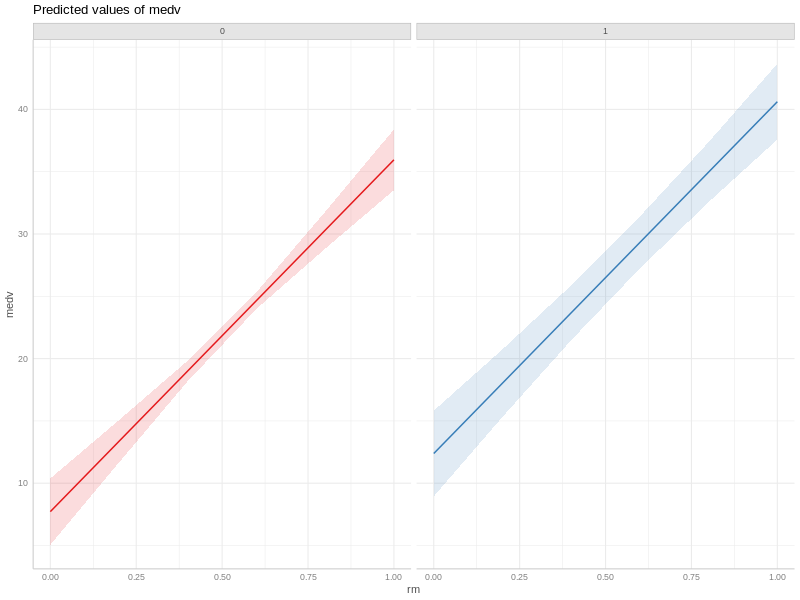

In [ ]:
%%R -w 800 -h 600 -u px
rm.chas <- ggeffects::predict_response(fit.glm, terms = c("rm", "chas"))
plot(rm.chas, facets = TRUE)

In [ ]:
%%R
rm.chas.age <- ggeffects::predict_response(fit.glm, terms = c("rm", "age", "chas"))
rm.chas.age

# Predicted values of medv

age: 0.37
chas: 0

  rm | Predicted |       95% CI
-------------------------------
0.00 |      8.34 |  5.59, 11.08
0.20 |     13.98 | 12.12, 15.84
0.60 |     25.28 | 24.15, 26.40
1.00 |     36.57 | 33.92, 39.22

age: 0.37
chas: 1

  rm | Predicted |       95% CI
-------------------------------
0.00 |     13.00 |  9.49, 16.51
0.20 |     18.65 | 15.83, 21.47
0.60 |     29.94 | 27.66, 32.22
1.00 |     41.24 | 38.02, 44.46

age: 0.66
chas: 0

  rm | Predicted |       95% CI
-------------------------------
0.00 |      7.73 |  5.07, 10.39
0.20 |     13.38 | 11.68, 15.08
0.60 |     24.67 | 24.00, 25.34
1.00 |     35.97 | 33.53, 38.40

age: 0.66
chas: 1

  rm | Predicted |       95% CI
-------------------------------
0.00 |     12.39 |  8.95, 15.83
0.20 |     18.04 | 15.33, 20.75
0.60 |     29.33 | 27.25, 31.42
1.00 |     40.63 | 37.58, 43.67

age: 0.96
chas: 0

  rm | Predicted |       95% CI
-------------------------------
0.00 |      7.10 |  4.24,  9.97
0.20 |   

Not all rows are shown in the output. Use `print(..., n = Inf)` to show
  all rows.



`geom_smooth()` using formula = 'y ~ x'


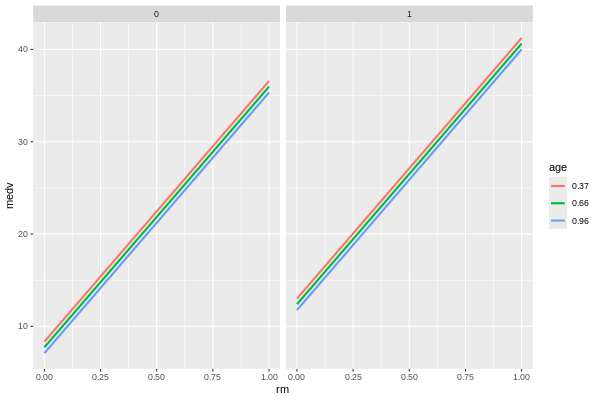

In [ ]:
%%R -w 600 -h 400 -u px
# select specific levels for grouping terms
ggplot(rm.chas.age, aes(x = x, y = predicted, colour = group)) +
  stat_smooth(method = "lm", se = FALSE) +
  facet_wrap(~facet) +
  labs(
    y = ggeffects::get_y_title(rm.chas.age),
    x = ggeffects::get_x_title(rm.chas.age),
    colour = ggeffects::get_legend_title(rm.chas.age)
  )


`effect_plot()` function of {jtools}* package also plot simple effects in GLM regression models:

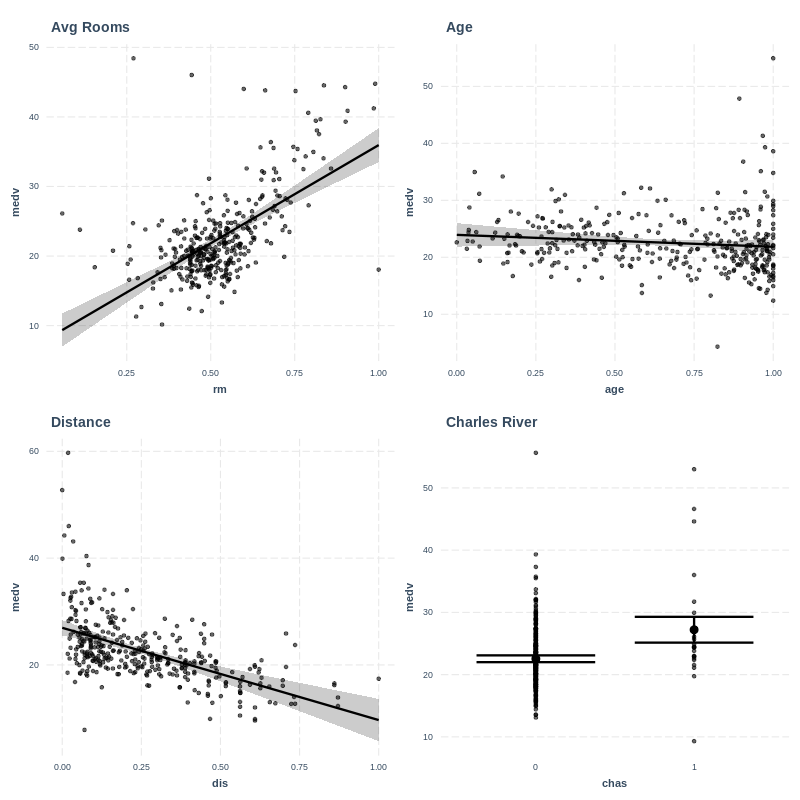

In [ ]:
%%R -w 800 -h 800 -u px

p1 <- jtools::effect_plot(fit.glm, main.title = "Avg Rooms", pred = rm, interval = TRUE, partial.residuals = TRUE)
p2 <- jtools::effect_plot(fit.glm, main.title = "Age", pred = age, interval = TRUE, partial.residuals = TRUE)
p3 <- jtools::effect_plot(fit.glm, main.title = "Distance", pred = dis, interval = TRUE, partial.residuals = TRUE)
p4 <- jtools::effect_plot(fit.glm, main.title = "Charles River", pred = chas, interval = TRUE, partial.residuals = TRUE)
(p1 + p2) / (p3 + p4)

### Cross-validation

In [ ]:
%%R
# K-fold Cross-validation
fit.glm.mf <- glm(medv ~ ., data = df, family = gaussian(link = "identity"))
cv_result <- cv.glm(data = df, glmfit = fit.glm.mf, K = 5)
print(cv_result$delta)

k_fold_cv_glm <- function(data, formula, k = 5) {
  if (k <= 1 || k > nrow(data)) {
    stop("Invalid number of folds.")
  }
  cv_mse <- numeric(k)
  predicted_values <- numeric(nrow(data))
  set.seed(42)
  folds <- sample(1:k, nrow(data), replace = TRUE)
  for (fold in 1:k) {
    test_idx <- which(folds == fold)
    train_idx <- setdiff(1:nrow(data), test_idx)
    train_data <- data[train_idx, ]
    test_data <- data[test_idx, ]
    model <- glm(formula, data = train_data)
    Y_pred <- predict(model, newdata = test_data)
    predicted_values[test_idx] <- Y_pred
    cv_mse[fold] <- mean((test_data[[as.character(formula[[2]])]] - Y_pred)^2)
  }
  return(list(average_mse = mean(cv_mse), predicted_values = predicted_values))
}

[1] 24.16353 23.90506


#### CV Prediction Performance

The {Matrics} package offers several useful functions to evaluate the performance of a regression model.

In [ ]:
%%R
formula <- medv ~ zn + indus + nox + rm + age + dis + tax + ptratio + chas + crim_lstat
cv.glm <- k_fold_cv_glm(mf, formula, k = 5)
cat("Average Cross-Validation MSE:", cv.glm$average_mse, "\n")
df$Pred.medv <- cv.glm$predicted_values

#### CV Prediction Performance
RMSE <- Metrics::rmse(df$medv, df$Pred.medv)
MAE <- Metrics::mae(df$medv, df$Pred.medv)
MSE <- Metrics::mse(df$medv, df$Pred.medv)
MDAE <- Metrics::mdae(df$medv, df$Pred.medv)
print(peformance.matrics <- cbind("RMSE" = RMSE, "MAE" = MAE, "MSE" = MSE, "MDAE" = MDAE))

Average Cross-Validation MSE: 27.4643 
       RMSE      MAE      MSE     MDAE
[1,] 5.2146 3.576574 27.19206 2.643277


#### 1:1 Plot

We can plot observed and predicted values with fitted regression line with {ggplot2} and {ggpmisc} packages.

`geom_smooth()` using formula = 'y ~ x'


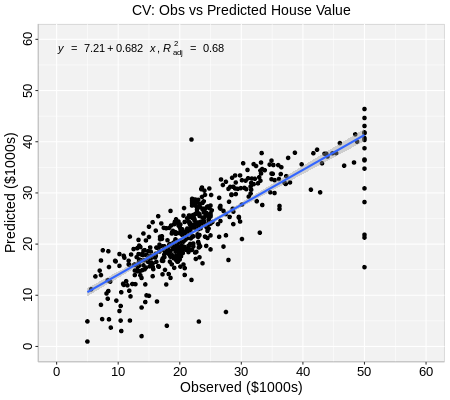

In [ ]:
%%R -w 450 -h 400 -u px

library(ggpmisc)
formula<-y~x

ggplot(df, aes(medv, Pred.medv)) +
  geom_point() +
  geom_smooth(method = "lm") +
  stat_poly_eq(use_label(c("eq", "adj.R2")), formula = y ~ x) +
  ggtitle("CV: Obs vs Predicted House Value") +
  xlab("Observed ($1000s)") + ylab("Predicted ($1000s)") +
  scale_x_continuous(limits = c(0, 60), breaks = seq(0, 60, 10)) +
  scale_y_continuous(limits = c(0, 60), breaks = seq(0, 60, 10)) +
  theme(
    panel.background = element_rect(fill = "grey95", colour = "gray75", size = 0.5, linetype = "solid"),
    axis.line = element_line(colour = "grey"),
    plot.title = element_text(size = 14, hjust = 0.5),
    axis.title.x = element_text(size = 14),
    axis.title.y = element_text(size = 14),
    axis.text.x = element_text(size = 13, colour = "black"),
    axis.text.y = element_text(size = 13, angle = 90, vjust = 0.5, hjust = 0.5, colour = "black")
  )

### Prediction at Test Locations





The `predict()` function will be used to predict the amount of SOC present in the testing locations. This will help to validate the accuracy of the GLM regression model.

In [ ]:
%%R
test$Pred.medv <- predict(fit.glm, test)

#### Prediction Performance

The {Matrics} package offers several useful functions to evaluate the performance of a regression model.



In [ ]:
%%R
#### Prediction Performance
RMSE <- Metrics::rmse(test$medv, test$Pred.medv)
MAE <- Metrics::mae(test$medv, test$Pred.medv)
MSE <- Metrics::mse(test$medv, test$Pred.medv)
MDAE <- Metrics::mdae(test$medv, test$Pred.medv)
print(peformance.matrics <- cbind("RMSE" = RMSE, "MAE" = MAE, "MSE" = MSE, "MDAE" = MDAE))

         RMSE      MAE      MSE     MDAE
[1,] 5.318994 3.780005 28.29169 2.861663


#### 1:1 Plot

We can plot observed and predicted values with fitted regression line with **ggplot2** and **ggpmisc** packages.

`geom_smooth()` using formula = 'y ~ x'


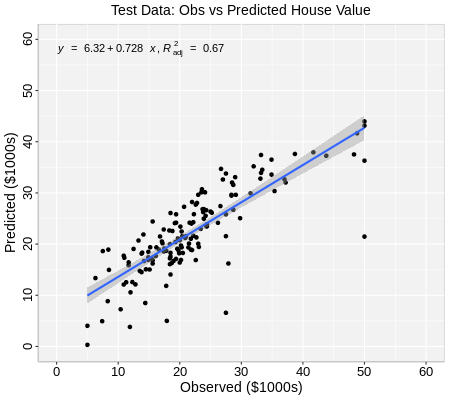

In [ ]:
%%R -w 450 -h 400 -u px

library(ggpmisc)
formula<-y~x

ggplot(test, aes(medv, Pred.medv)) +
  geom_point() +
  geom_smooth(method = "lm") +
  stat_poly_eq(use_label(c("eq", "adj.R2")), formula = y ~ x) +
  ggtitle("Test Data: Obs vs Predicted House Value") +
  xlab("Observed ($1000s)") + ylab("Predicted ($1000s)") +
  scale_x_continuous(limits = c(0, 60), breaks = seq(0, 60, 10)) +
  scale_y_continuous(limits = c(0, 60), breaks = seq(0, 60, 10)) +
  theme(
    panel.background = element_rect(fill = "grey95", colour = "gray75", size = 0.5, linetype = "solid"),
    axis.line = element_line(colour = "grey"),
    plot.title = element_text(size = 14, hjust = 0.5),
    axis.title.x = element_text(size = 14),
    axis.title.y = element_text(size = 14),
    axis.text.x = element_text(size = 13, colour = "black"),
    axis.text.y = element_text(size = 13, angle = 90, vjust = 0.5, hjust = 0.5, colour = "black")
  )

## Summary and Conclusion


This comprehensive tutorial covered the essentials of conducting Generalized Linear Model (GLM) regression analysis with a Gaussian distribution in R, from foundational concepts to advanced interpretation and evaluation techniques. We began by introducing the structure and key components of GLMs, particularly those that use the Gaussian distribution, and explored their suitability for continuous data. Building a GLM model from scratch allowed us to understand the model’s structure, including the linear predictors, error terms, and link functions.

Next, we used R’s `glm()` function to fit a Gaussian GLM more efficiently and compared it with the simpler `lm()` function, which directly applies to linear models. The tutorial guided interpreting model outputs, including understanding coefficients, statistical significance, and key model metrics. For this, we leveraged a range of powerful R packages such as `{performance}`, `{report}`, `{ggeffects}`, and `{jtools}` to streamline and enhance our interpretation and visualization of GLM outputs, making it easier to extract meaningful insights from the model.
We then addressed model performance evaluation using cross-validation and a hold-out test data set, demonstrating how these methods help assess model generalization and prevent overfitting. By using cross-validation and a separate test data set, we ensured a robust and unbiased estimate of model performance, essential for applying the model confidently to new data.

This tutorial equipped you with a thorough understanding of Gaussian GLMs, from constructing models and using R’s built-in functions to interpreting results and evaluating model performance. With knowledge of theoretical underpinnings and practical tools, you are now well-prepared to perform GLM regression analysis in R. The tutorial highlighted various packages that simplify and enhance interpretation, allowing you to select the tools that best align with your analytically goals—whether prioritizing simplicity, flexibility, or advanced customization. Armed with this knowledge, you can confidently apply GLM regression techniques to analyze continuous data in diverse fields and effectively communicate your findings through clear interpretations and visuals, making GLMs an invaluable tool in your data analysis toolkit.




## References

1.  [6.1 - Introduction to GLMs](https://online.stat.psu.edu/stat504/lesson/6/6.1)

2.  [GLM in R: Generalized Linear Model](https://www.datacamp.com/tutorial/generalized-linear-models)

3.  [GLM in R: Generalized Linear Model with Example](https://www.guru99.com/r-generalized-linear-model.html)

4. [Generalized Linear Models With Examples in R](https://www.academia.edu/37886943/Springer_Texts_in_Statistics_Generalized_Linear_Models_With_Examples_in_R)



